In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [7]:
data_df = pd.read_csv("news_ling_features.csv")

In [8]:
data_df.head()

,text,Polarity,t_syll3,a_char_pw,simp_adj_var,simp_adv_var,simp_intj_var,simp_noun_var,simp_num_var,simp_pron_var,...,a_punct_pw,a_sconj_pw,a_sym_pw,a_verb_pw,a_space_pw,a_intj_ps,a_num_ps,a_pron_ps,a_propn_ps,smog
0,"You Can Smell Hillary’s FearDaniel Greenfield,...",0,56,4.22,0.80,0.66,0.0,0.66,0.60,0.17,...,0.08,0.02,0.0,0.11,0.02,0.0,0.06,1.39,1.77,4.58
1,Watch The Exact Moment Paul Ryan Committed Pol...,0,21,4.67,0.97,0.96,0.0,0.90,0.67,0.33,...,0.13,0.02,0.0,0.14,0.02,0.0,0.35,1.62,2.35,5.13
2,Kerry to go to Paris in gesture of sympathyU.S...,1,16,4.67,0.90,0.92,0.0,0.76,0.50,0.41,...,0.09,0.03,0.0,0.12,0.02,0.0,0.12,1.71,4.59,5.54
3,Bernie supporters on Twitter erupt in anger ag...,0,27,5.09,0.84,1.00,0.0,0.77,0.48,0.67,...,0.18,0.01,0.0,0.10,0.03,0.0,1.21,0.95,4.58,6.81
4,The Battle of New York: Why This Primary Matte...,1,11,4.31,0.85,0.92,0.0,0.65,1.00,0.43,...,0.15,0.02,0.0,0.12,0.03,0.0,0.38,1.00,2.76,4.13


In [9]:
# getting the feature info dictionaries for reference

import lftk

features = lftk.search_features(return_format="list_dict")

no permutation as feature selection since with colinear features, the info will be obtainable with a different feature

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from yellowbrick.model_selection import rfecv
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

workflow: 
- initialize standard basic default models
- determine PCA hyperparams - 33 components
- make 2 pipelines: 
        pipe 1: scale, pca, train test
        pipe 2: scale feature selection, trian test
- compare the perf of the models
- select 1
- hyper param tuning

In [11]:
X = data_df.drop(["text", "Polarity"], axis=1)
y = data_df["Polarity"]

In [14]:
# X

In [16]:
X_test

240     1
783     0
1721    1
2741    1
4630    1
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Polarity, Length: 5384, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.15)

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

## SECTION WITH COMULITATIVE IMPORTANCE????

https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

## PCA

In [18]:
pca = PCA(random_state=42)

pca_fit = pca.fit(X_train_stand)
cum_explained_ratio = np.cumsum(pca_fit.explained_variance_ratio_)

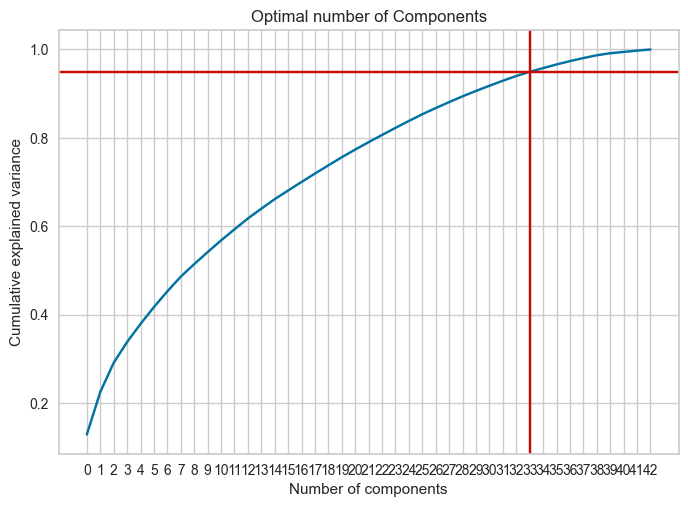

In [19]:
plt.plot(cum_explained_ratio)

plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.axvline(x = 33, color = 'r', linestyle = '-')
plt.xticks(ticks=np.arange(0, len(cum_explained_ratio), step=1))

plt.title("Optimal number of Components")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## Recursive Feature Elimination

In [21]:
rfecv = rfecv(RandomForestClassifier(random_state=42), X_train_stand, y_train, scoring="f1_weighted")

*workflow from here onwards works with rfecv from sklearn, check that yellowbrick is the same in terms of attributes

In [ ]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=7)

In [ ]:
rfe.fit(X_train_stand, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=7)

In [ ]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True])

In [ ]:
features_train = list(X.columns)
selection_mask = list(rfe.support_)

In [ ]:
features_train

['t_syll3',
 'a_char_pw',
 'simp_adj_var',
 'simp_adv_var',
 'simp_intj_var',
 'simp_noun_var',
 'simp_num_var',
 'simp_pron_var',
 'simp_propn_var',
 'simp_sconj_var',
 'simp_sym_var',
 'simp_verb_var',
 'simp_space_var',
 'root_aux_var',
 'root_part_var',
 'root_propn_var',
 'root_space_var',
 'corr_adp_var',
 'corr_cconj_var',
 'corr_det_var',
 'corr_pron_var',
 'corr_punct_var',
 'corr_sconj_var',
 'uber_ttr_no_lem',
 'a_adj_pw',
 'a_adp_pw',
 'a_adv_pw',
 'a_aux_pw',
 'a_cconj_pw',
 'a_det_pw',
 'a_intj_pw',
 'a_noun_pw',
 'a_part_pw',
 'a_punct_pw',
 'a_sconj_pw',
 'a_sym_pw',
 'a_verb_pw',
 'a_space_pw',
 'a_intj_ps',
 'a_num_ps',
 'a_pron_ps',
 'a_propn_ps',
 'smog']

In [ ]:
len(features_train)

43

In [ ]:
selection_mask.count(False)

36

In [ ]:
from itertools import compress

selected_features = list(compress(features_train, selection_mask))

In [ ]:
selected_features

['t_syll3',
 'root_propn_var',
 'root_space_var',
 'corr_punct_var',
 'uber_ttr_no_lem',
 'a_propn_ps',
 'smog']

In [ ]:
# features

In [ ]:
name_selected_features = [feature["name"] for feature in features if feature["key"] in selected_features]
name_selected_features

['total_number_of_words_more_than_three_syllables',
 'root_proper_nouns_variation',
 'root_spaces_variation',
 'corrected_punctuations_variation',
 'uber_type_token_ratio_no_lemma',
 'average_number_of_proper_nouns_per_sentence',
 'smog_index']

## Models

In [ ]:
def score_models(X, y, model, selected_features=selected_features, pca=PCA(n_components=33), cv=StratifiedKFold(n_splits=5)):
    
    X_features = X[selected_features]
    
    scores_rfe = cross_validate(model, X_features, y, scoring = ["f1_weighted", "accuracy", "precision", "recall"], cv=cv)
    
    processed_scores_rfe = {f"mean_{key}": np.mean(value) for key, value in scores_rfe.items()}
    processed_scores_rfe["model_name"] = str(model)[:-2]    
    processed_scores_rfe["method"] = "rfe"

    return processed_scores_rfe

NameError: name 'selected_features' is not defined

In [ ]:
models = [RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42), AdaBoostClassifier(random_state=42)]
scores = []

for model in models:
    processed_scores_rfe = score_models(X, y, model)
    scores.append(processed_scores_rfe)

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

In [ ]:
scores

[{'mean_fit_time': 0.7524344444274902,
  'mean_score_time': 0.024048233032226564,
  'mean_test_f1_weighted': 0.7619450951693347,
  'mean_test_accuracy': 0.7619573796369377,
  'mean_test_precision': 0.760103320556673,
  'mean_test_recall': 0.7663146128815918,
  'model_name': 'RandomForestClassifier(random_state=4',
  'method': 'rfe'},
 {'mean_fit_time': 2.3807211399078367,
  'mean_score_time': 0.02126479148864746,
  'mean_test_f1_weighted': 0.7730790144370017,
  'mean_test_accuracy': 0.7731649565903709,
  'mean_test_precision': 0.7833267779999182,
  'mean_test_recall': 0.7562323952408156,
  'model_name': 'RandomForestClassifier(random_state=4',
  'method': 'pca'},
 {'mean_fit_time': 0.6824907779693603,
  'mean_score_time': 0.007560539245605469,
  'mean_test_f1_weighted': 0.751868661310545,
  'mean_test_accuracy': 0.7521704814522494,
  'mean_test_precision': 0.737075418989049,
  'mean_test_recall': 0.7852385801932488,
  'model_name': 'GradientBoostingClassifier(random_state=4',
  'method

## Results

In [ ]:
results_df = pd.DataFrame(scores)

In [ ]:
results_df

,mean_fit_time,mean_score_time,mean_test_f1_weighted,mean_test_accuracy,mean_test_precision,mean_test_recall,model_name,method
0,0.752434,0.024048,0.761945,0.761957,0.760103,0.766315,RandomForestClassifier(random_state=4,rfe
1,2.380721,0.021265,0.773079,0.773165,0.783327,0.756232,RandomForestClassifier(random_state=4,pca
2,0.682491,0.007561,0.751869,0.752170,0.737075,0.785239,GradientBoostingClassifier(random_state=4,rfe
3,5.302377,0.007192,0.760380,0.760537,0.749782,0.783031,GradientBoostingClassifier(random_state=4,pca
4,0.212457,0.013443,0.726605,0.727072,0.710969,0.766634,AdaBoostClassifier(random_state=4,rfe
5,1.157439,0.013738,0.736387,0.736701,0.724712,0.765051,AdaBoostClassifier(random_state=4,pca


go ahead with random forest and the rfe 7 features

## GRIDSEARCH

In [ ]:
param_grid = { 
    'n_estimators': [50, 100, 200, 300], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [2, 4, 8, None],
    "min_samples_split": [2, 5, 10],
    'max_leaf_nodes': [4, 8, None]
    }

In [ ]:
from itertools import product

hyperparams, values = zip(*param_grid.items())
number_combinations = [dict(zip(hyperparams, v)) for v in product(*values)]

print(len(number_combinations))
print(number_combinations)

432
[{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': None}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': None}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': None}, {'n_estimators': 50,

In [ ]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,  scoring="f1_weighted", refit=True, cv=StratifiedKFold(n_splits=5), verbose=3)

In [ ]:
gridsearch.fit(X_train_stand, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 8, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [4, 8, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1_weighted', verbose=2)

In [ ]:
gridsearch_results  = gridsearch.cv_results_
gridsearch_results_df = pd.DataFrame(gridsearch_results)

In [ ]:
gridsearch_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_leaf_nodes',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
gridsearch_results_df.to_csv("gridsearch_results_05-08.csv", index=False)

In [ ]:
import pandas as pd

gridsearch_results_df = pd.read_csv("gridsearch_results_11-08.csv")

In [ ]:
gridsearch_results_df.columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_max_depth', 'param_max_features',
       'param_max_leaf_nodes', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [ ]:
# cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time',
#        'std_score_time', 'param_max_depth', 'param_max_features',
#        'param_max_leaf_nodes', 'param_min_samples_split', 'param_n_estimators',
#        'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
#        'mean_test_score', 'std_test_score', 'rank_test_score']

In [ ]:
gridsearch_results_df.head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.109198,0.002495,0.005334,0.000471,2.0,sqrt,4.0,2,50,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.692967,0.697629,0.707801,0.699466,0.006194,352
1,1,0.215736,0.004031,0.008184,0.000260,2.0,sqrt,4.0,2,100,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.698634,0.705440,0.711132,0.705069,0.005109,325
2,2,0.424639,0.003193,0.013674,0.000473,2.0,sqrt,4.0,2,200,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.698146,0.705693,0.711906,0.705248,0.005626,316
3,3,0.632555,0.006293,0.019177,0.000613,2.0,sqrt,4.0,2,300,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.696329,0.705374,0.711881,0.704528,0.006377,334
4,4,0.105520,0.001625,0.005669,0.000474,2.0,sqrt,4.0,5,50,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.692967,0.697629,0.707801,0.699466,0.006194,352


In [ ]:
gridsearch_results_df.sort_values(by='mean_test_score', ascending=False).head()

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
351,351,2.916775,0.041463,0.063522,0.002169,NaN,sqrt,NaN,2,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.793522,0.794981,0.810505,0.799669,0.007685,1
358,358,1.819554,0.011314,0.038836,0.000229,NaN,sqrt,NaN,10,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.794406,0.793083,0.807648,0.798379,0.006577,2
349,349,0.976906,0.010063,0.023888,0.001996,NaN,sqrt,NaN,2,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.793045,0.794508,0.804774,0.797442,0.005218,3
350,350,1.956512,0.006317,0.043189,0.000475,NaN,sqrt,NaN,2,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.791638,0.791664,0.808596,0.797299,0.007988,4
354,354,1.882312,0.019151,0.040171,0.000242,NaN,sqrt,NaN,5,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.792073,0.791190,0.808105,0.797123,0.007774,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,405,1.196352,0.009878,0.007331,0.000473,NaN,NaN,4.0,10,100,"{'max_depth': None, 'max_features': None, 'max...",0.702071,0.692883,0.697202,0.697386,0.003753,424
185,185,1.190884,0.006137,0.007670,0.000473,4.0,NaN,4.0,5,100,"{'max_depth': 4, 'max_features': None, 'max_le...",0.702071,0.692883,0.697202,0.697386,0.003753,424
297,297,1.190221,0.006214,0.007001,0.000002,8.0,NaN,4.0,10,100,"{'max_depth': 8, 'max_features': None, 'max_le...",0.702071,0.692883,0.697202,0.697386,0.003753,424
397,397,1.193355,0.010142,0.007173,0.000238,NaN,NaN,4.0,2,100,"{'max_depth': None, 'max_features': None, 'max...",0.702071,0.692883,0.697202,0.697386,0.003753,424


Evaluation of individual hyperparameters

In [ ]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_features")

,mean_test_score
param_max_features,
log2,0.728749
sqrt,0.728649


In [ ]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_depth")

,mean_test_score
param_max_depth,
2.0,0.702784
4.0,0.722841
8.0,0.735006


In [ ]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_leaf_nodes")

,mean_test_score
param_max_leaf_nodes,
4.0,0.704690
8.0,0.722081


In [ ]:
gridsearch_results_df.pivot_table("mean_test_score", "param_min_samples_split")

,mean_test_score
param_min_samples_split,
2,0.725745
5,0.725733
10,0.725541


In [ ]:
gridsearch_results_df.pivot_table("mean_test_score", "param_n_estimators")

,mean_test_score
param_n_estimators,
50,0.723747
100,0.725910
200,0.726475
300,0.726561


In [ ]:
gridsearch_results_df.pivot_table("mean_test_score", ["param_max_depth", "param_max_leaf_nodes"])

mean_test_score
param_max_depth param_max_leaf_nodes                 
2.0             4.0                          0.702784
                8.0                          0.702784
4.0             4.0                          0.705326
                8.0                          0.728232
8.0             4.0                          0.705326
                8.0                          0.728655

Filtering down parameters


In [ ]:
threshold = 0.79
models_over_threshold = gridsearch_results_df[gridsearch_results_df["mean_test_score"] > threshold]
len(models_over_threshold)

27

In [ ]:
models_over_threshold.pivot_table("mean_test_score", "param_n_estimators")

,mean_test_score
param_n_estimators,
50,0.791105
100,0.792288
200,0.794828
300,0.794894


In [ ]:
models_over_threshold.sort_values(by="mean_test_score", ascending=False)

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
351,351,2.916775,0.041463,0.063522,2.168928e-03,NaN,sqrt,NaN,2,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.793522,0.794981,0.810505,0.799669,0.007685,1
358,358,1.819554,0.011314,0.038836,2.287408e-04,NaN,sqrt,NaN,10,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.794406,0.793083,0.807648,0.798379,0.006577,2
349,349,0.976906,0.010063,0.023888,1.996084e-03,NaN,sqrt,NaN,2,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.793045,0.794508,0.804774,0.797442,0.005218,3
350,350,1.956512,0.006317,0.043189,4.749143e-04,NaN,sqrt,NaN,2,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.791638,0.791664,0.808596,0.797299,0.007988,4
354,354,1.882312,0.019151,0.040171,2.420916e-04,NaN,sqrt,NaN,5,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.792073,0.791190,0.808105,0.797123,0.007774,5
387,387,2.468613,0.006626,0.062682,2.240030e-04,NaN,log2,NaN,2,300,"{'max_depth': None, 'max_features': 'log2', 'm...",0.793536,0.792613,0.803397,0.796516,0.004881,6
359,359,2.757645,0.026465,0.058199,1.704685e-03,NaN,sqrt,NaN,10,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.792066,0.791186,0.804338,0.795863,0.006003,7
355,355,2.838536,0.031746,0.059766,3.335967e-04,NaN,sqrt,NaN,5,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.790178,0.788333,0.809041,0.795851,0.009357,8
390,390,1.613958,0.013695,0.040840,2.300094e-04,NaN,log2,NaN,5,200,"{'max_depth': None, 'max_features': 'log2', 'm...",0.792563,0.790719,0.802915,0.795399,0.005367,9
391,391,2.413378,0.015262,0.060851,4.723887e-04,NaN,log2,NaN,5,300,"{'max_depth': None, 'max_features': 'log2', 'm...",0.793998,0.784073,0.807190,0.795087,0.009469,10


In [ ]:
final_candidate = models_over_threshold[models_over_threshold["rank_test_score"] == 3]
hyperparams = final_candidate[["params"]].iloc[0]
param_dict = hyperparams[0]

C:\Users\alber\AppData\Local\Temp\ipykernel_11184\2370781955.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  param_dict = hyperparams[0]


In [ ]:
print(param_dict)
print(type(param_dict))

{'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 100}
<class 'str'>


In [ ]:
from ast import literal_eval

param_dict = literal_eval(param_dict)
print(param_dict)
print(type(param_dict))

{'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_split': 2, 'n_estimators': 100}
<class 'dict'>


## FINAL MODEL

check out https://scikit-learn.org/stable/common_pitfalls.html

nota: antes de hacer todo lo de pca y rfe tengo que splittear en test/train para evitar data leakage

se splitea en train/test ANTES DE LA PIPELINE

LA PIPELINE COGE SOLO TRAIN PARA SPLITTEAR

HAVE A LOOK AT THE RANDOM STATE THING

In [ ]:
# after splitting the train/test, save the scaler or just do a pipeline
# can access this way: 
# # For example, get the first step of the pipeline steps[0]
# then get the actual scaler object [1]
# clf.steps[0][1].scale_

## PIPELINE

in: pieza de texto
1. lftk para conseguir los features de rfe - funcion para crear X
2. standard -  can save the scaler or manually set the mean/std
3. predict - load model and .predict

poner los imports dentro de la funcion o fuera? fuera i think right

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True random_state=42)
# meter el para grim que elija al final

steps = [("scaler", StandardScaler()), 
        ("model", RandomForestClassifier(random_state=42, 
                                        max_depth=None, 
                                        max_features= 'sqrt', 
                                        max_leaf_nodes= None, 
                                        min_samples_split= 2, 
                                        n_estimators= 100 ))
        ]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

# save pipeline

In [ ]:
# evaluate the pipeline but if we already have the cv evaluation and the train-test splits are the same, 
# then I can just skip the eval right? DOUBLE CHECK

In [ ]:
import pickle

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

## Workflow to get predictions

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
def extract_linguistic_features(text):
    
    doc = nlp(text)
    
    features = ['t_syll3', 'root_propn_var', 'root_space_var', 'corr_punct_var', 'uber_ttr_no_lem', 'a_propn_ps', 'smog']
    LFTK = lftk.Extractor(docs = doc)
    LFTK.customize(stop_words = True, round_decimal = 2)
    doc_features = LFTK.extract(features=features)
    
    X = pd.DataFrame(doc_features)
    
    return X

In [ ]:
def predict_text(text, pipeline_path):
    
    with open(pipeline_path, 'rb') as f:
        pipeline = pickle.load(f)
    
    X_transformed = extract_linguistic_features(text)
    prediction = pipeline.predict(X_transformed)
    
    return prediction

In [ ]:
# example of predicting text

## Get SHAP explanation

In [ ]:
# make a json dict to translate features to the names and save the feature list form the keys of said dictionary

feature_names = ['total_number_of_words_more_than_three_syllables', 'root_proper_nouns_variation', 'root_spaces_variation', 'corrected_punctuations_variation', 'uber_type_token_ratio_no_lemma', 'average_number_of_proper_nouns_per_sentence', 'smog_index']



https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137